In [71]:
#Import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import and cleaning listings data, load as pandas dataframe

In [72]:


listing_data = pd.read_csv('\\Users\\cofos\\Downloads\\listings (1).csv')
listing_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2804,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1620,5,5,2016-12-10,0.06,5,208
4,15180,The Melkbaai - Beachfront,59663,Heinri,NaN,Ward 83,-34.11124,18.82349,Entire home/apt,575,2,0,NaN,NaN,1,365


In [73]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24079 entries, 0 to 24078
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24079 non-null  int64  
 1   name                            24079 non-null  object 
 2   host_id                         24079 non-null  int64  
 3   host_name                       24076 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24079 non-null  object 
 6   latitude                        24079 non-null  float64
 7   longitude                       24079 non-null  float64
 8   room_type                       24079 non-null  object 
 9   price                           24079 non-null  int64  
 10  minimum_nights                  24079 non-null  int64  
 11  number_of_reviews               24079 non-null  int64  
 12  last_review                     

In [74]:
listing_data['price'].dtype

dtype('int64')

In [75]:
# Categorizing differernt mean price based on room_type
type_of_room = listing_data.groupby(['room_type']).price.mean().reset_index()
type_of_room

,room_type,price
0,Entire home/apt,2881.534116
1,Hotel room,2287.154412
2,Private room,1059.597928
3,Shared room,1657.101449


In [76]:
type_of_room2 = listing_data.groupby(['room_type']).price.median().reset_index()
type_of_room

,room_type,price
0,Entire home/apt,2881.534116
1,Hotel room,2287.154412
2,Private room,1059.597928
3,Shared room,1657.101449


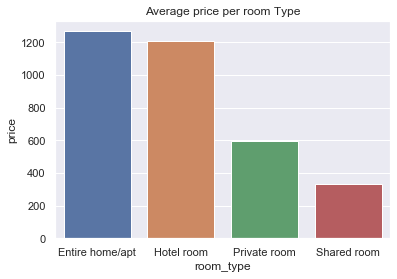

In [77]:
ax = sns.barplot(x="room_type", y="price", data=type_of_room2).set_title('Average price per room Type')

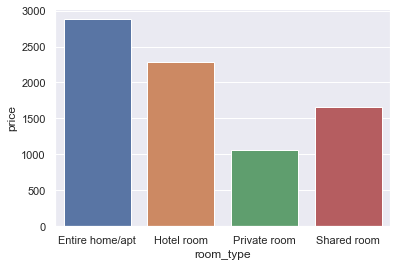

In [78]:
ax = sns.barplot(x="room_type", y="price", data=type_of_room)

In [80]:
# Categorizing differernt listing based on room_type
listing_data.rename(columns={'id':'listings'}, inplace=True)
number_listing_per_room = listing_data.groupby(['room_type']).listings.count().reset_index()
number_listing_per_room

,room_type,listings
0,Entire home/apt,18320
1,Hotel room,408
2,Private room,5213
3,Shared room,138


In [81]:
type(number_listing_per_room)

pandas.core.frame.DataFrame

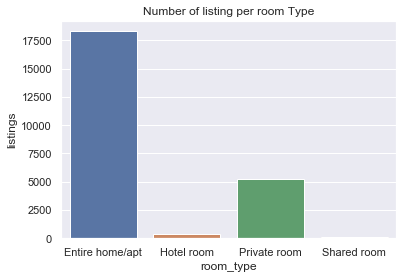

In [82]:
ax = sns.barplot(x="room_type", y="listings", data=number_listing_per_room).set_title('Number of listing per room Type')

In [83]:
#Merging the number_lisitng_per room table with type_of_ room table
room_types = type_of_room.merge(number_listing_per_room, on ='room_type')
room_types

,room_type,price,listings
0,Entire home/apt,2881.534116,18320
1,Hotel room,2287.154412,408
2,Private room,1059.597928,5213
3,Shared room,1657.101449,138


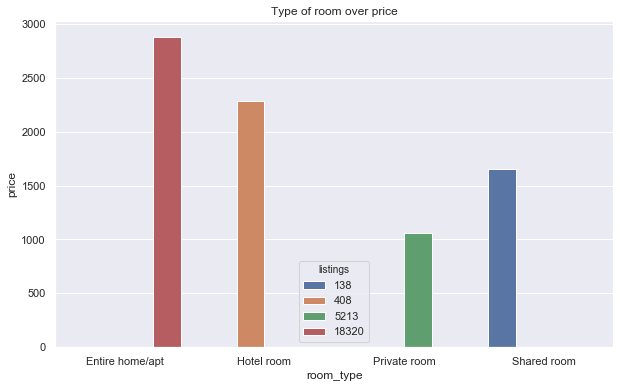

In [84]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="room_type", y="price",hue = 'listings', data=room_types).set_title("Type of room over price")

In [87]:
Reviews_per_room_type = listing_data.groupby('room_type').number_of_reviews.sum().reset_index()

In [88]:
#merging the room_types with reviewa_per_room_type
room_types = room_types.merge(Reviews_per_room_type, on ='room_type')
room_types

,room_type,price,listings,number_of_reviews_x,number_of_reviews_y
0,Entire home/apt,2881.534116,18320,302288,302288
1,Hotel room,2287.154412,408,1800,1800
2,Private room,1059.597928,5213,44700,44700
3,Shared room,1657.101449,138,350,350


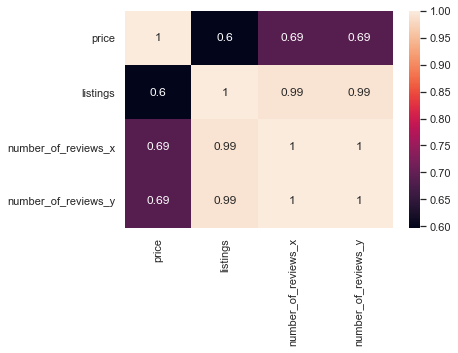

In [89]:
corrMatrix = room_types.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [90]:
#Categorizing differernt mean price,listing,reviews based on neighbourhood
price_on_neighbourhood = listing_data.groupby('neighbourhood').price.mean().reset_index()
price_on_neighbourhood = price_on_neighbourhood.sort_values(by = 'price',  ascending=False)
price_on_neighbourhood.head()


,neighbourhood,price
8,Ward 106,144793.000000
93,Ward 92,37298.800000
83,Ward 79,9494.000000
56,Ward 54,6018.903907
65,Ward 62,4718.753070


In [91]:
top_listing_neighbourhood = listing_data.groupby('neighbourhood').listings.count().reset_index()
top_listing_neighbourhood 

,neighbourhood,listings
0,Ward 1,234
1,Ward 10,32
2,Ward 100,392
3,Ward 101,1
4,Ward 102,62
...,...,...
94,Ward 93,3
95,Ward 94,8
96,Ward 96,2
97,Ward 98,1


In [92]:
top_review_neighbourhood = listing_data.groupby('neighbourhood').number_of_reviews.sum().reset_index()
top_review_neighbourhood


,neighbourhood,number_of_reviews
0,Ward 1,1066
1,Ward 10,94
2,Ward 100,2249
3,Ward 101,0
4,Ward 102,310
...,...,...
94,Ward 93,4
95,Ward 94,36
96,Ward 96,1
97,Ward 98,0


In [93]:
neighbourhood_table = price_on_neighbourhood.merge(top_listing_neighbourhood, on = 'neighbourhood') 
neighbourhood_table.head()

,neighbourhood,price,listings
0,Ward 106,144793.000000,1
1,Ward 92,37298.800000,5
2,Ward 79,9494.000000,1
3,Ward 54,6018.903907,3174
4,Ward 62,4718.753070,733


In [94]:
neighbourhood_table = neighbourhood_table.merge(top_review_neighbourhood, on = 'neighbourhood')
neighbourhood_table


,neighbourhood,price,listings,number_of_reviews
0,Ward 106,144793.000000,1,0
1,Ward 92,37298.800000,5,6
2,Ward 79,9494.000000,1,0
3,Ward 54,6018.903907,3174,56401
4,Ward 62,4718.753070,733,7659
...,...,...,...,...
94,Ward 99,348.000000,1,0
95,Ward 12,338.800000,5,6
96,Ward 93,316.333333,3,4
97,Ward 98,299.000000,1,0


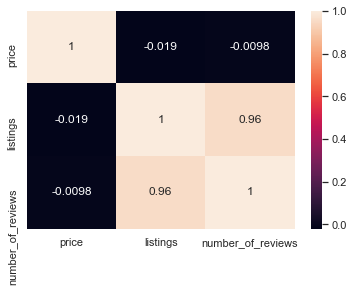

In [95]:
corrMatrix = neighbourhood_table.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [97]:
listing2 = listing_data[['listings','room_type','number_of_reviews','price']]
listing2.head()

,listings,room_type,number_of_reviews,price
0,3191,Entire home/apt,54,819
1,15007,Entire home/apt,27,2050
2,15068,Entire home/apt,0,2804
3,15077,Private room,5,1620
4,15180,Entire home/apt,0,575


In [98]:
dummy = pd.get_dummies(listing2, columns =['room_type'],drop_first = True)
dummy

,listings,number_of_reviews,price,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3191,54,819,0,0,0
1,15007,27,2050,0,0,0
2,15068,0,2804,0,0,0
3,15077,5,1620,0,1,0
4,15180,0,575,0,0,0
...,...,...,...,...,...,...
24074,43523009,0,745,0,0,0
24075,43524607,0,348,0,1,0
24076,43531227,0,592,0,1,0
24077,43532629,0,401,0,0,0


In [99]:
from sklearn import linear_model

In [100]:
#importing review data
review_data = pd.read_csv('\\Users\\cofos\\Downloads\\reviews (1).csv.gz')
review_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...


In [101]:
#merging review and lsiting data
combined_data = listing_data.merge(review_data, left_on ='listings', right_on ='listing_id', how = 'outer' )
combined_data.head()

,listings,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.476,Entire home/apt,819,...,2020-03-07,0.63,1,362,3191.0,4888238.0,2013-05-31,5737473.0,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.476,Entire home/apt,819,...,2020-03-07,0.63,1,362,3191.0,9128602.0,2013-12-09,8170322.0,Anita,Das Cottage liegt ruhig und sicher. Wir haben...
2,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.476,Entire home/apt,819,...,2020-03-07,0.63,1,362,3191.0,9924130.0,2014-01-20,4039279.0,Zacki,This cottage was a great base from which to ex...
3,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.476,Entire home/apt,819,...,2020-03-07,0.63,1,362,3191.0,16659537.0,2014-07-31,9729939.0,Doug,I had a great stay. All my needs were well ex...
4,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.476,Entire home/apt,819,...,2020-03-07,0.63,1,362,3191.0,23247470.0,2014-11-26,9681619.0,Christopher,Excellent host. She provided everything we cou...


In [102]:
#converting data from object to datatime and splitting to day, month, year
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data["day"] = combined_data['date'].map(lambda x: x.day)
combined_data["month"] = combined_data['date'].map(lambda x: x.month)
combined_data["year"] = combined_data['date'].map(lambda x: x.year)
combined_data.drop(['neighbourhood_group','listing_id'], axis =1, inplace = True)
combined_data.head()

,listings,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,calculated_host_listings_count,availability_365,id,date,reviewer_id,reviewer_name,comments,day,month,year
0,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,1,362,4888238.0,2013-05-31,5737473.0,Kathleen,Great home away from home! Bridgette and Marth...,31.0,5.0,2013.0
1,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,1,362,9128602.0,2013-12-09,8170322.0,Anita,Das Cottage liegt ruhig und sicher. Wir haben...,9.0,12.0,2013.0
2,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,1,362,9924130.0,2014-01-20,4039279.0,Zacki,This cottage was a great base from which to ex...,20.0,1.0,2014.0
3,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,1,362,16659537.0,2014-07-31,9729939.0,Doug,I had a great stay. All my needs were well ex...,31.0,7.0,2014.0
4,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,1,362,23247470.0,2014-11-26,9681619.0,Christopher,Excellent host. She provided everything we cou...,26.0,11.0,2014.0


In [103]:
combined_data.dropna(subset = ["year"], inplace=True)

In [104]:
combined_data['year'] = combined_data['year'].astype(int)

In [105]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349138 entries, 0 to 355947
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   listings                        349138 non-null  int64         
 1   name                            349138 non-null  object        
 2   host_id                         349138 non-null  int64         
 3   host_name                       349083 non-null  object        
 4   neighbourhood                   349138 non-null  object        
 5   latitude                        349138 non-null  float64       
 6   longitude                       349138 non-null  float64       
 7   room_type                       349138 non-null  object        
 8   price                           349138 non-null  int64         
 9   minimum_nights                  349138 non-null  int64         
 10  number_of_reviews               349138 non-null  int64  

In [106]:
top_service_providers = combined_data.groupby(['name','room_type']).price.median().reset_index()
top_service_providers = top_service_providers.sort_values(by= 'price',ascending = False).head(20)
top_service_providers

,name,room_type,price
12726,Self catering apartment,Entire home/apt,124995.0
9205,Luxus- The Lap of Luxury,Entire home/apt,89992.0
16937,safe and big open house with big space around it,Entire home/apt,78800.0
16323,Villa Laika Estate in Llandudno - Ocean View,Entire home/apt,69663.0
4539,"Clifton Luxury Villa, Cape Town",Entire home/apt,64995.0
11271,Pitlochry,Entire home/apt,62999.0
4805,Constantia Views,Entire home/apt,60955.0
16993,★ Incredible views right on Camps Bay Beach,Entire home/apt,53357.0
1874,Bali Bay Holiday Apartments Complete Building,Entire home/apt,45002.0
1564,Architectural masterpiece,Entire home/apt,40002.0


C:\Users\cofos\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cofos\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0, flags=flags)


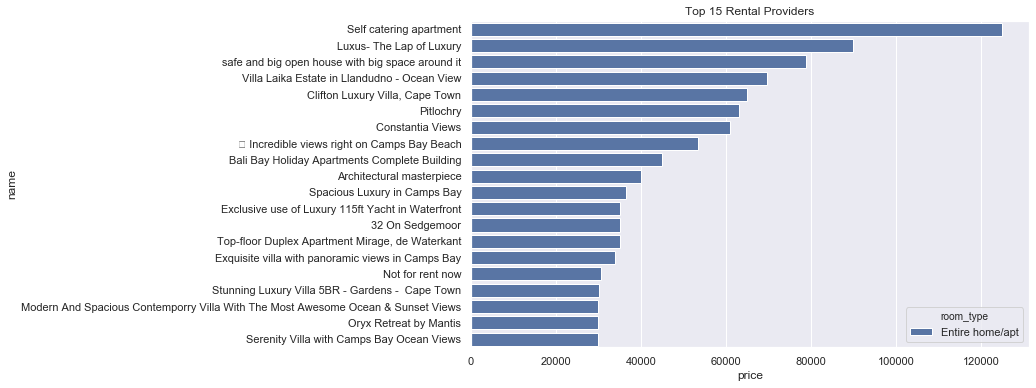

In [107]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="price", y="name",hue = 'room_type', data=top_service_providers).set_title("Top 15 Rental Providers")

In [108]:
no_of_review_per_year = combined_data.groupby(['year']).number_of_reviews.sum().reset_index()
no_of_review_per_year

,year,number_of_reviews
0,2010,195
1,2011,2713
2,2012,16177
3,2013,70556
4,2014,319452
5,2015,1057565
6,2016,2767458
7,2017,5026876
8,2018,6498960
9,2019,7892469


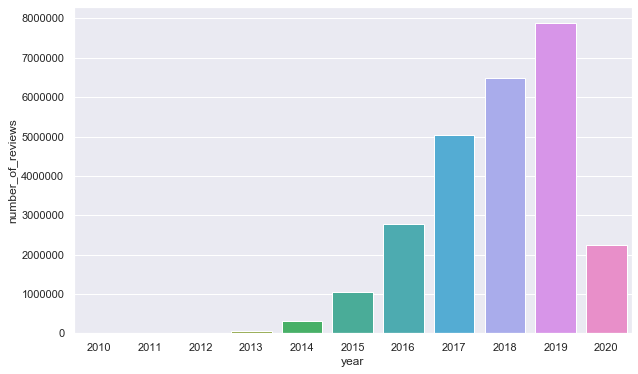

In [109]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="year", y= "number_of_reviews", data= no_of_review_per_year )

Text(0.5, 1.0, 'Number of Reviews over Time')

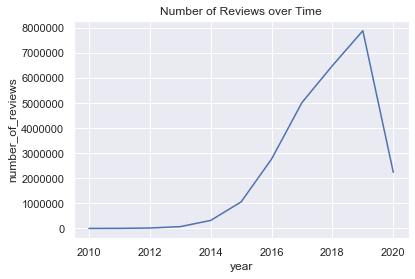

In [110]:
sns.lineplot(x='year', y='number_of_reviews', data=no_of_review_per_year).set_title("Number of Reviews over Time")

In [111]:
no_of_listings_per_year = combined_data.groupby(['year']).listings.count().reset_index()
no_of_listings_per_year

,year,listings
0,2010,6
1,2011,38
2,2012,219
3,2013,735
4,2014,3015
5,2015,10683
6,2016,29701
7,2017,57944
8,2018,80231
9,2019,119849


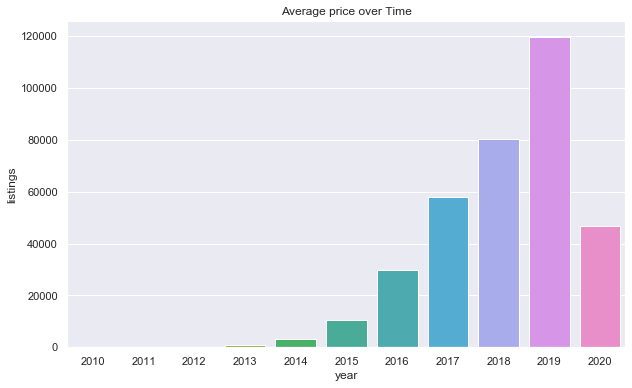

In [112]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="year", y= "listings", data = no_of_listings_per_year ).set_title("Average price over Time")

Text(0.5, 1.0, 'Number of listing over time')

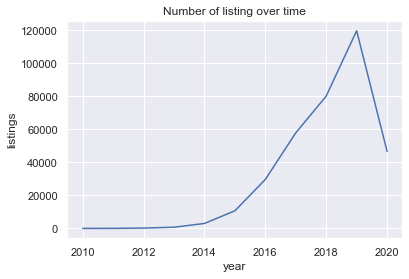

In [113]:
sns.lineplot(x='year', y='listings', data=no_of_listings_per_year).set_title("Number of listing over time")

In [114]:
avg_price_per_room_type = combined_data.groupby(['year','room_type']).price.median().reset_index()
avg_price_per_room_type

,year,room_type,price
0,2010,Entire home/apt,714.0
1,2010,Private room,557.0
2,2011,Entire home/apt,977.5
3,2011,Private room,1429.0
4,2012,Entire home/apt,995.0
5,2012,Private room,733.0
6,2013,Entire home/apt,995.0
7,2013,Hotel room,982.0
8,2013,Private room,558.0
9,2014,Entire home/apt,1128.0


In [115]:
Years=[2010,2012,2014,2016,2018,2019]
price_change = avg_price_per_room_type[avg_price_per_room_type.year.isin(Years)]
price_change 

,year,room_type,price
0,2010,Entire home/apt,714.0
1,2010,Private room,557.0
4,2012,Entire home/apt,995.0
5,2012,Private room,733.0
9,2014,Entire home/apt,1128.0
10,2014,Hotel room,1163.0
11,2014,Private room,576.0
16,2016,Entire home/apt,1092.0
17,2016,Hotel room,1423.0
18,2016,Private room,525.0


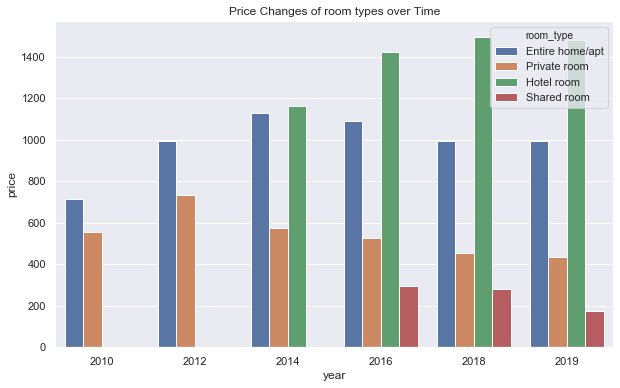

In [116]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="year", y= "price",hue = 'room_type', data = price_change ).set_title("Price Changes of room types over Time")

In [117]:
avg_price_per_year = combined_data.groupby('year').price.median().reset_index()
avg_price_per_year

,year,price
0,2010,714
1,2011,995
2,2012,995
3,2013,960
4,2014,1022
5,2015,993
6,2016,993
7,2017,916
8,2018,934
9,2019,907


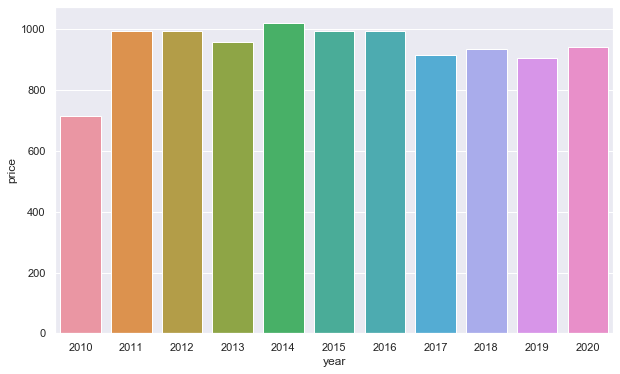

In [118]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="year", y= "price", data = avg_price_per_year )

Text(0.5, 1.0, 'Average price over Time')

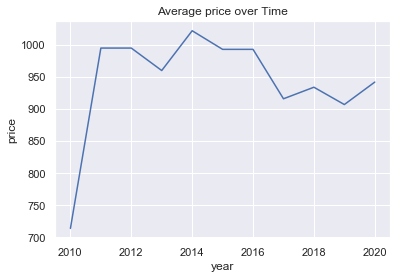

In [119]:
sns.set(style='darkgrid')
sns.lineplot(x='year', y='price', data= avg_price_per_year).set_title("Average price over Time")

In [120]:
combined_data['estimated_revenue']= combined_data['price']* combined_data['number_of_reviews']* combined_data['minimum_nights']
combined_data.head(3)

,listings,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,id,date,reviewer_id,reviewer_name,comments,day,month,year,estimated_revenue
0,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,362,4888238.0,2013-05-31,5737473.0,Kathleen,Great home away from home! Bridgette and Marth...,31.0,5.0,2013,132678
1,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,362,9128602.0,2013-12-09,8170322.0,Anita,Das Cottage liegt ruhig und sicher. Wir haben...,9.0,12.0,2013,132678
2,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.476,Entire home/apt,819,3,...,362,9924130.0,2014-01-20,4039279.0,Zacki,This cottage was a great base from which to ex...,20.0,1.0,2014,132678


In [121]:
estimated_annual_revenue = combined_data.groupby(['name','room_type']).estimated_revenue.mean().reset_index()
top_10 = estimated_annual_revenue.sort_values(by= 'estimated_revenue', ascending = False).head(10)
top_10

,name,room_type,estimated_revenue
2756,Bishopscourt villa,Entire home/apt,27812160.0
5508,Designer Loft apartment with Amazing Sea Views,Entire home/apt,26112240.0
3404,Camps Bay Guesthouse,Entire home/apt,18228510.0
13278,Spacious Penthouse in the Heart of Cape Town.,Entire home/apt,8529240.0
14771,Supersize central studio in the heart of Cape ...,Entire home/apt,8365224.0
15968,Ultimate Luxury apartment with amazing views,Entire home/apt,8103780.0
1966,Baylife,Entire home/apt,7856520.0
1151,Above it all in Central Cape Town 3BD Amazing ...,Entire home/apt,7659900.0
13981,Stunning Treasure In Gardens!,Entire home/apt,7648032.0
3399,Camps Bay Forest House Sea/Mountain views,Entire home/apt,7576600.0


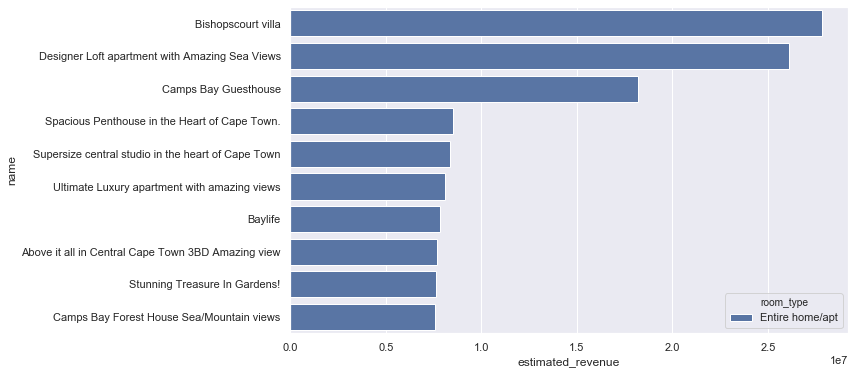

In [122]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="estimated_revenue", y= "name", hue = 'room_type',data = top_10)

In [123]:
annual_revenue = combined_data.groupby('year').estimated_revenue.mean().reset_index()
annual_revenue

,year,estimated_revenue
0,2010,247209.500000
1,2011,361410.578947
2,2012,401790.771689
3,2013,354122.008163
4,2014,444812.360531
5,2015,413348.482917
6,2016,414639.359887
7,2017,365434.145002
8,2018,356516.643417
9,2019,280094.177165


Text(0.5, 1.0, 'Estimated Revenue')

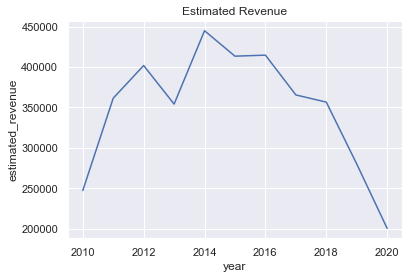

In [124]:
sns.set(style='darkgrid')
sns.lineplot(x='year', y='estimated_revenue', data= annual_revenue).set_title("Estimated Revenue")

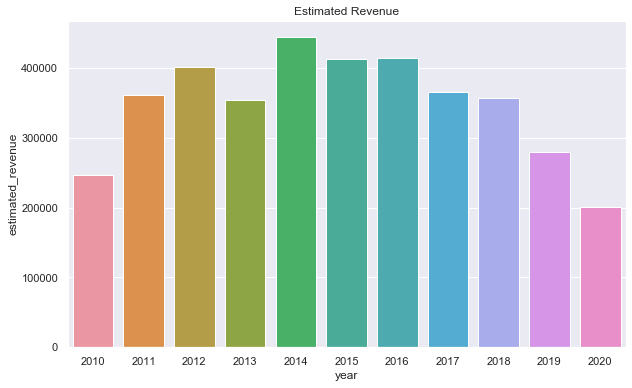

In [125]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="year", y= "estimated_revenue", data = annual_revenue ).set_title("Estimated Revenue")

In [126]:
#establishing relationship between listings, number of reviews and changes in prices
sub = combined_data.groupby('year').sum().reset_index()
sub

,year,listings,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,id,reviewer_id,day,month,estimated_revenue
0,2010,122891,493562,-2.035567e+02,1.107977e+02,5300,31,195,1.62,10,1452,4.373160e+05,7.397850e+05,73.0,44.0,1483257
1,2011,3435368,17097529,-1.288567e+03,6.998530e+02,52478,211,2713,24.62,143,11533,2.337881e+07,3.168194e+07,650.0,369.0,13733602
2,2012,62600626,279131183,-7.428310e+03,4.034252e+03,287754,3270,16177,160.51,829,61237,4.660157e+08,4.183454e+08,3604.0,1723.0,87992179
3,2013,508778459,2216240168,-2.494817e+04,1.354274e+04,892732,5335,70556,774.44,2726,194243,4.900227e+09,3.610804e+09,11622.0,5651.0,260279676
4,2014,5758003874,24136897042,-1.023571e+05,5.553305e+04,4916994,11055,319452,4036.14,8984,772684,5.354937e+10,3.255578e+10,47882.0,22944.0,1341109267
5,2015,44279537825,175499696559,-3.627428e+05,1.968008e+05,16091776,39432,1057565,15449.85,34865,2529524,4.500771e+11,2.271798e+11,166848.0,78798.0,4415801843
6,2016,235165527933,899006036953,-1.008596e+06,5.473303e+05,45102401,114724,2767458,47999.71,108451,6779918,2.697324e+12,1.169492e+12,467362.0,210600.0,12315203628
7,2017,690084736769,2695129139646,-1.967786e+06,1.068396e+06,80957385,216411,5026876,102745.89,238692,12708439,9.866549e+12,3.620783e+12,900808.0,375964.0,21174716098
8,2018,1258848212784,4959102406372,-2.724626e+06,1.479797e+06,111514235,293976,6498960,157789.29,521397,17670142,2.341583e+13,7.138906e+12,1241820.0,532360.0,28603686818
9,2019,2512917607671,9834076178057,-4.069687e+06,2.211081e+06,168245813,411317,7892469,248357.10,1355352,26476500,5.822349e+13,1.479597e+13,1890483.0,787769.0,33569007039


In [127]:
table = sub[['listings','price','number_of_reviews']]
table

,listings,price,number_of_reviews
0,122891,5300,195
1,3435368,52478,2713
2,62600626,287754,16177
3,508778459,892732,70556
4,5758003874,4916994,319452
5,44279537825,16091776,1057565
6,235165527933,45102401,2767458
7,690084736769,80957385,5026876
8,1258848212784,111514235,6498960
9,2512917607671,168245813,7892469


In [128]:
table = sub[['listings','price','number_of_reviews']]
table

,listings,price,number_of_reviews
0,122891,5300,195
1,3435368,52478,2713
2,62600626,287754,16177
3,508778459,892732,70556
4,5758003874,4916994,319452
5,44279537825,16091776,1057565
6,235165527933,45102401,2767458
7,690084736769,80957385,5026876
8,1258848212784,111514235,6498960
9,2512917607671,168245813,7892469


In [129]:
correlation analysis
corrMatrix = table.corr()
corrMatrix

,listings,price,number_of_reviews
listings,1.000000,0.965274,0.893085
price,0.965274,1.000000,0.977729
number_of_reviews,0.893085,0.977729,1.000000


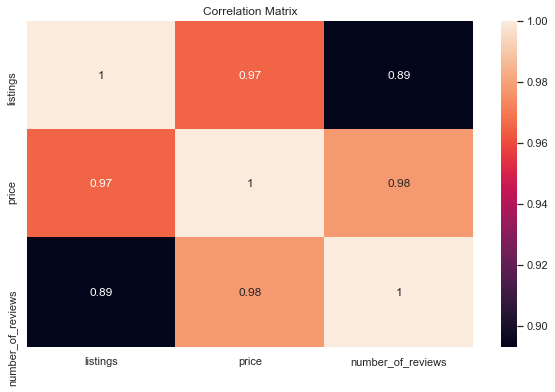

In [130]:
#correlation Analysis Matrix heatmap
plt.figure(figsize=(10,6))
corrMatrix = table.corr()
sns.heatmap(corrMatrix, annot=True).set_title("Correlation Matrix")
plt.show()

In [131]:
correl = combined_data.groupby('year').mean().reset_index()
correl

,year,listings,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,id,reviewer_id,day,month,estimated_revenue
0,2010,2.048183e+04,8.226033e+04,-33.926115,18.466282,883.333333,5.166667,32.500000,0.270000,1.666667,242.000000,7.288600e+04,1.232975e+05,12.166667,7.333333,247209.500000
1,2011,9.040442e+04,4.499350e+05,-33.909665,18.417183,1381.000000,5.552632,71.394737,0.647895,3.763158,303.500000,6.152319e+05,8.337352e+05,17.105263,9.710526,361410.578947
2,2012,2.858476e+05,1.274572e+06,-33.919224,18.421240,1313.945205,14.931507,73.867580,0.732922,3.785388,279.621005,2.127925e+06,1.910253e+06,16.456621,7.867580,401790.771689
3,2013,6.922156e+05,3.015293e+06,-33.943094,18.425494,1214.601361,7.258503,95.994558,1.053660,3.708844,264.276190,6.666975e+06,4.912659e+06,15.812245,7.688435,354122.008163
4,2014,1.909786e+06,8.005604e+06,-33.949297,18.418922,1630.843781,3.666667,105.954229,1.338687,2.979768,256.279934,1.776099e+07,1.079794e+07,15.881260,7.609950,444812.360531
5,2015,4.144860e+06,1.642794e+07,-33.955146,18.421862,1506.297482,3.691098,98.995132,1.446209,3.263596,236.780305,4.213022e+07,2.126554e+07,15.618085,7.376018,413348.482917
6,2016,7.917765e+06,3.026854e+07,-33.958317,18.428011,1518.548231,3.862631,93.177267,1.616097,3.651426,228.272381,9.081594e+07,3.937552e+07,15.735564,7.090670,414639.359887
7,2017,1.190951e+07,4.651265e+07,-33.960136,18.438427,1397.165971,3.734830,86.754038,1.773193,4.119357,219.322777,1.702773e+08,6.248763e+07,15.546183,6.488403,365434.145002
8,2018,1.569030e+07,6.181030e+07,-33.959761,18.444207,1389.914559,3.664120,81.003104,1.966687,6.498698,220.240830,2.918551e+08,8.897940e+07,15.478057,6.635340,356516.643417
9,2019,2.096736e+07,8.205389e+07,-33.956791,18.448891,1403.814909,3.431960,65.853441,2.072250,11.308830,220.915485,4.858071e+08,1.234551e+08,15.773874,6.573013,280094.177165


,listings,price,number_of_reviews
0,2.048183e+04,883.333333,32.500000
1,9.040442e+04,1381.000000,71.394737
2,2.858476e+05,1313.945205,73.867580
3,6.922156e+05,1214.601361,95.994558
4,1.909786e+06,1630.843781,105.954229
5,4.144860e+06,1506.297482,98.995132
6,7.917765e+06,1518.548231,93.177267
7,1.190951e+07,1397.165971,86.754038
8,1.569030e+07,1389.914559,81.003104
9,2.096736e+07,1403.814909,65.853441


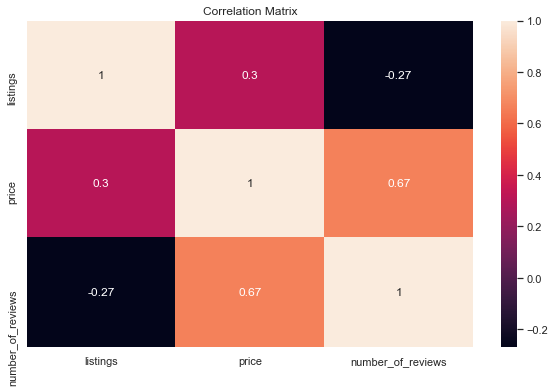

In [135]:
plt.figure(figsize=(10,6))
corrMatrix = new_sub.corr()
sns.heatmap(corrMatrix, annot=True).set_title("Correlation Matrix")
plt.show()